# Recording a Dissociation Curve for H$_2$: RHF vs. UHF


In [2]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-poster', 'seaborn-ticks'])

then we set the maximum ressources that can be used

In [3]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)

Calculate the energy of H$_2$ at the following internuclear distances at
both the RHF/6-31G and UHF/6-31G level of theory. 

You are given the example for RHF and you need to modify the UHF calculation. 

The calcuation works by creating a list of the distances we want to try and then by iterating over it:

- we create a `h2` molecule replacing the z coordinate with our desired distance using a Python f-string
- we specify the logfile and set appending to `True`
- we specify the reference we want to use and set `guess_mix` to false and use `'guess':'sad'` for the guess
- we use `psi4.energy` specificing the desired method, basis and molecule
- we clean up temporary files and add our calculated energy to a list for the plotting

For the UHF calculations first try the same options and then set the options to `'guess':'gwh', 'guess_mix':True`

In [9]:
psi4.core.clean_options()
psi4.core.clean()

In [10]:
distances = [0.50,0.60,0.80,1.00,1.50,2.50,4.00, 5.00, 6.00]


energies_RHF = []
print(f'R(Å) |  E_RHF [a.u]')
print( '-----|-------------')
      
for dist in distances:
    h2 = psi4.geometry(f"""
    0 1
    symmetry c1
    H 0.0 0.0 0.0
    H 0.0 0.0 {dist}
    """)
 
    psi4.core.set_output_file(f'dissociationcurve_RHF.log', True)
    psi4.set_options({'reference':'rhf', 'guess_mix': "False"})
    E_RHF = psi4.energy('hf/6-31G', molecule=h2)

    print(f'{dist}  | {E_RHF:.3f}')

    energies_RHF.append(E_RHF)
    
psi4.core.clean_options()
psi4.core.clean()

R(Å) |  E_RHF [a.u]
-----|-------------
0.5  | -1.058
0.6  | -1.110
0.8  | -1.124
1.0  | -1.095
1.5  | -0.998
2.5  | -0.857
4.0  | -0.770
5.0  | -0.751
6.0  | -0.742


Now plot the interaction energy 

$$
\begin{aligned}
          E_{inter}^{6-31G}(\mathbf{R}) = E_{H_2}^{6-31G}(\mathbf{R})-2\cdot E_H^{6-31G}
          \end{aligned}
$$

against the interatomic distance $\mathbf{R}$.

The value for the $E_H^{6-31G}$ you can calculate as described below:

In [3]:
h = psi4.geometry(f"""
H 0.0 0.0 0.0
""")
psi4.set_options({'reference':'uhf'})
psi4.core.set_output_file(f'single_UHF.log', True)
E_H_UHF = psi4.energy('hf/6-31G', molecule=h)


Psi4 comes with a handy set of [conversion factors](https://psicode.org/psi4manual/master/autodoc_physconst.html) e.g to convert a.u into kcal mol$^{-1}$

In [5]:
psi4.constants.hartree2kcalmol

627.5094737775374

In [13]:
atomicunitToKcal = 630  # 1 a.u = 630 kcal/mol

we can convert our lists of energies to numpy arrays and use broadcasting to quickly substract the energy of the single H atoms from each list item to get the interaction energy. 

```{margin}
We have to use `np.array` as standard python lists (defined using `[item1, item2]`) do not support broadcasting. 
Broadcasting is an efficient way to perform arithmetics on vectors and matrices in python. Instead of having to write a for loop to perform aritemethic for each element we can simply substract the single H energy once and the operation is broadcast. 
```

In [14]:
E_inter_RHF =  (np.array(energies_RHF)-2*E_H_UHF)*psi4.constants.hartree2kcalmol

E_inter_UHF =  (np.array(energies_UHF)-2*E_H_UHF)*psi4.constants.hartree2kcalmol
    

No handles with labels found to put in legend.


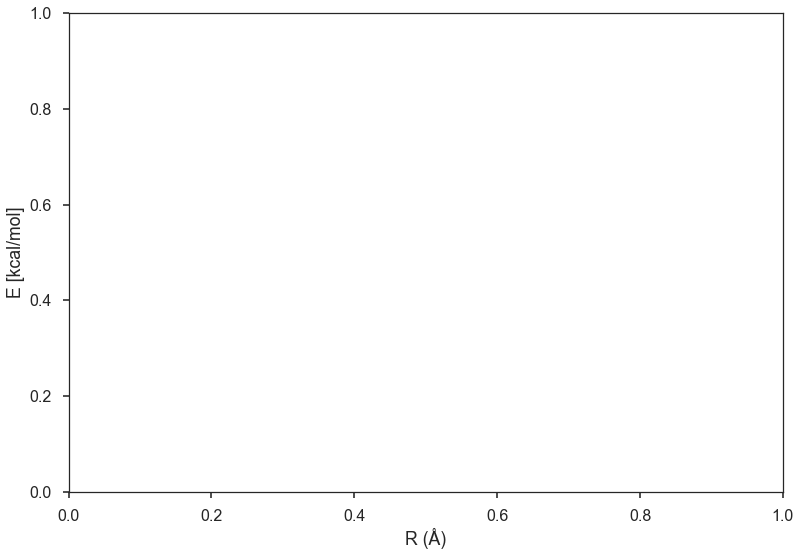

In [6]:
fig, ax = plt.subplots(1)

#ax.plot(distances,E_inter_RHF, label='RHF')
#ax.plot(distances,E_inter_UHF,label='UHF')

ax.axhline(0, color='gray', lw=1, linestyle='--')

ax.set_xlabel('R (Å)')
ax.set_ylabel('E [kcal/mol]')
ax.legend()
plt.show()

```{admonition} Exercise 
:class: exercise
Explain the physical origin of the difference between the two
    dissociation curves. Discuss how important this difference is by
    comparing to the energy that is normally required to break a bond.
```

```{admonition} Exercise 
:class: exercise
Try to find out why we are using `guess_mix:True` and `'guess':'gwh'`. What happend when you used the same settings as for the RHF calculation. 
You can look at the Psi4 manual to find out about the different options for the initial guess. 
```